In [1]:
import re
import warnings
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline
%load_ext autoreload
%autoreload 2
warnings.filterwarnings("ignore")

from utils import quick_load_liuzhong_health_check_data
from plot_utils import Stack, Scatter, Sankey, BxxPvalue

df_table1plus, l_consecute_man2p, l_consecute_man3p, df_table1plus_3p_revMM, df_meta_group, rename_dict = quick_load_liuzhong_health_check_data()
workdir = "/cluster/home/bqhu_jh/projects/healthman/analysis/liuzhong/human/clinical/figures"

## CBC overview

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 10.16it/s]


len                                                  mean  \
month            1     2     3     4     5     6    11    12           1   
period                                                                     
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    4.628442   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    4.613636   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    4.565163   
Control-2021  1721  4017  3278  3072  4319  4052  2276  1029  246.240170   
Control-2022  1715  4028  3278  3068  4326  4059  2260  1025  249.590379   
Test-2023     1715  4016  3267  3065  4323  4062  2244  1027  254.409913   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    5.940110   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    6.040090   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    6.073325   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029  138.036316   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025  137.772886   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027  135.434441   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   41.662222   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   41.605481   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   41.341492   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   90.223329   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   90.393965   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   90.767133   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   29.884709   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   29.928659   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   29.738578   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029  331.014914   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025  330.883673   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027  327.414627   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   12.630796   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   12.627668   
Test-2023     1716  4016  3268  3067  4325  4063  2244  1027   12.933596   
Control-2021  1708  3978  3251  3055  4285  4014  2258  1023   10.814666   
Control-2022  1699  3997  3253  3052  4307  4041  2246  1022   10.791642   
Test-2023     1701  3988  3244  3053  4308  4045  2234  1024   10.519518   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    3.331615   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    3.273248   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    3.378805   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    2.045881   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    2.186650   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    2.121786   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    0.407321   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    0.416362   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    0.411393   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    0.034339   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    0.033860   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    0.031402   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029    0.121570   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025    0.129764   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027    0.129942   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   55.196543   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   53.527959   
Test-2023     1716  4017  3268  3067  4325  4063  2244  1027   55.005711   
Control-2021  1721  4017  3278  3074  4321  4054  2276  1029   35.190509   
Control-2022  1715  4028  3278  3068  4326  4060  2261  1025   

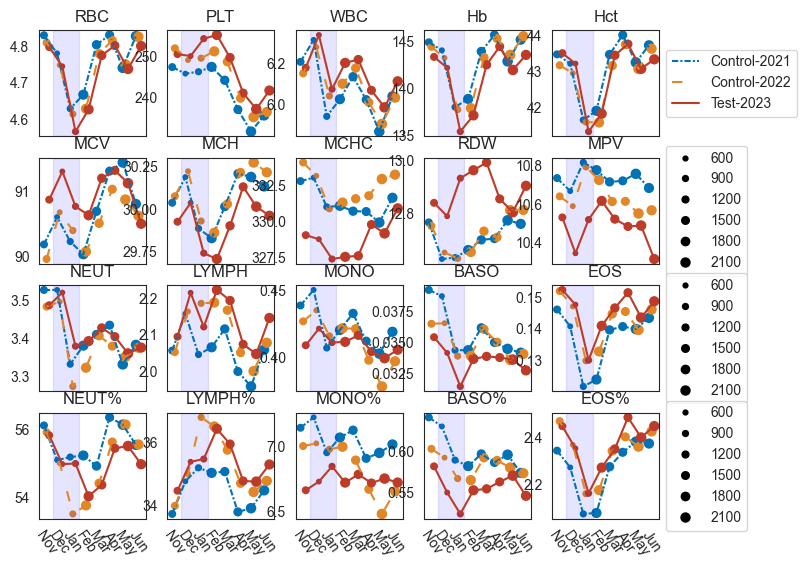

In [2]:
l_tags = list(df_meta_group[df_meta_group["combined_item_name_en"]=="CBC"]["item_id"])
l_tags = [
    'v9057','v9064','v9045','v9058','v9059',
    'v9060','v9061','v9062','v9063','v9065',
    'v9051','v9055','v9089','v9091','v9090',
    'v9046','v9047','v9048','v9049','v9050',
]
l_months = [11,12,1,2,3,4,5,6]

plt_scatter = Scatter(n_cols=5, figsize=(8,8), n_rows=5, rename_dict=rename_dict)

fig, df_res = plt_scatter.plot_scatter(df_table1plus_3p_revMM, l_tags, order=l_months)
fig.savefig(f"{workdir}/Figure2_A.pdf")
df_res

## RDW Scatter for different ages

RDW


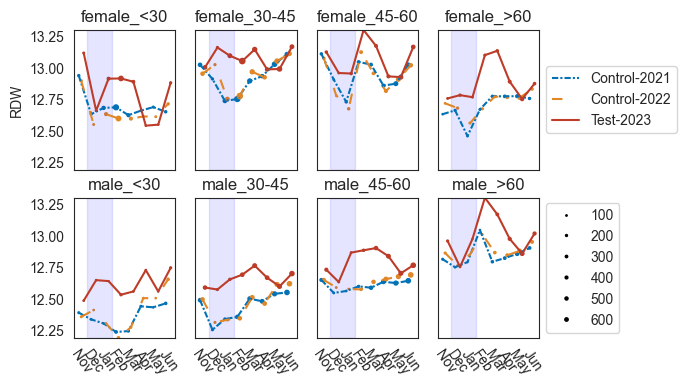

In [3]:
tag = l_tags[8]
print(rename_dict[tag])
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)
fig.show()
fig.savefig(f"{workdir}/FigureS2_A.pdf")

## boxplot_pvalue for RDW

,item_id,gender,age_group,month,period,n,fold_change,log10_p
0,v9063,female,<30,11,2021-2022,182,0.996791,0.106324
1,v9063,female,<30,11,2022-2023,142,1.017138,0.762194
2,v9063,female,30-45,11,2021-2022,539,0.994584,0.380989
3,v9063,female,30-45,11,2022-2023,544,1.003890,0.267412
4,v9063,female,45-60,11,2021-2022,227,0.997353,0.097069
...,...,...,...,...,...,...,...,...
59,v9063,male,30-45,6,2022-2023,891,1.006369,1.442058
60,v9063,male,45-60,6,2021-2022,940,1.003702,0.818321
61,v9063,male,45-60,6,2022-2023,934,1.006031,1.885420
62,v9063,male,>60,6,2021-2022,304,1.003728,0.282063


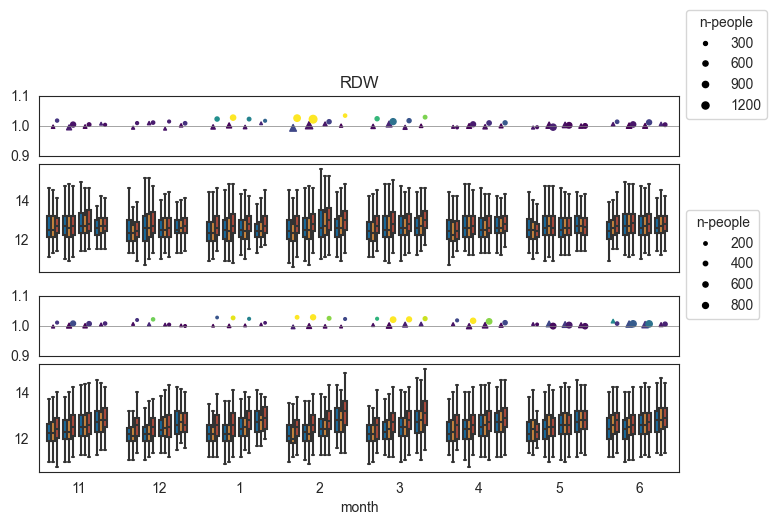

In [4]:
plot_box = BxxPvalue(figsize=(8,4), rename_dict=rename_dict)

fig, df_res = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
)
fig.savefig(f"{workdir}/Figure2_D.pdf")
df_res

## Other plots

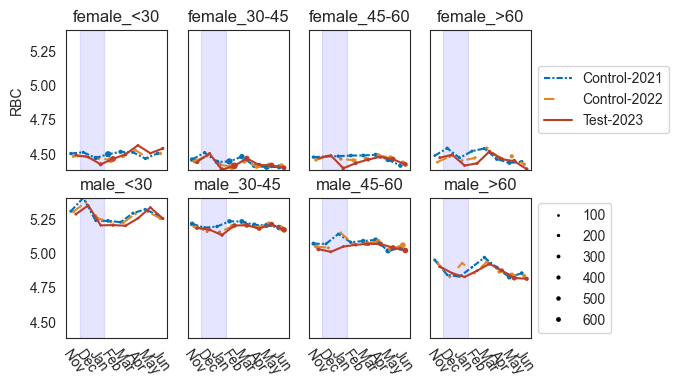

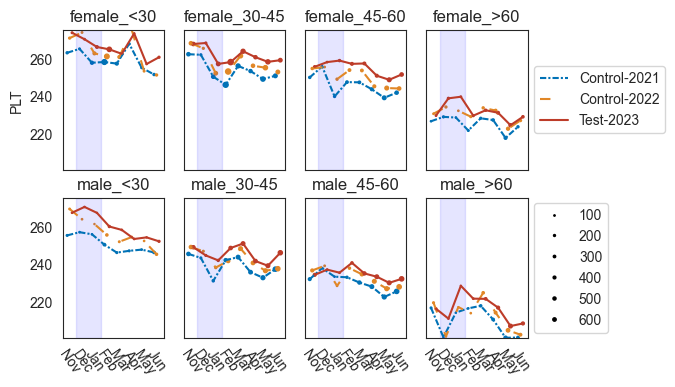

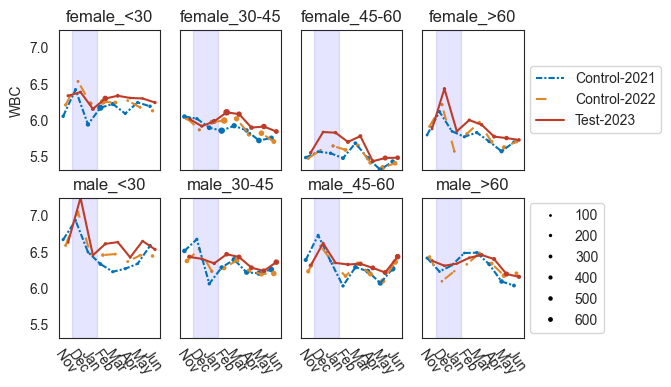

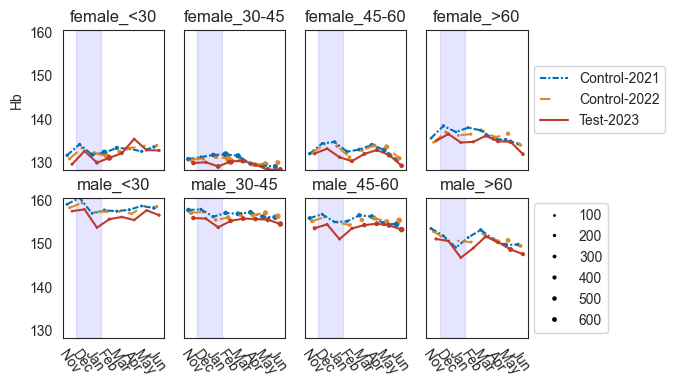

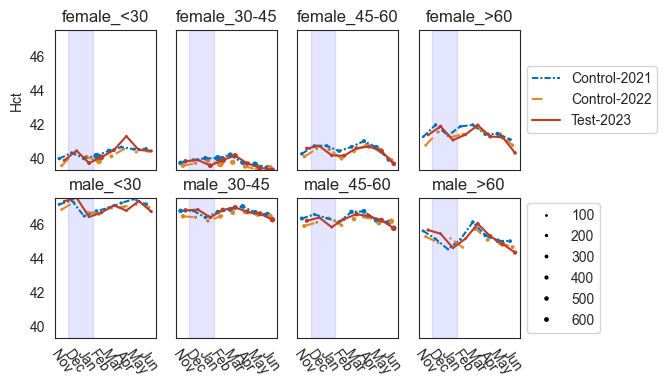

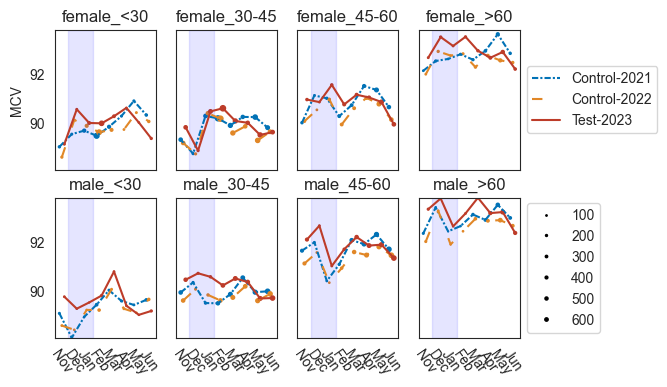

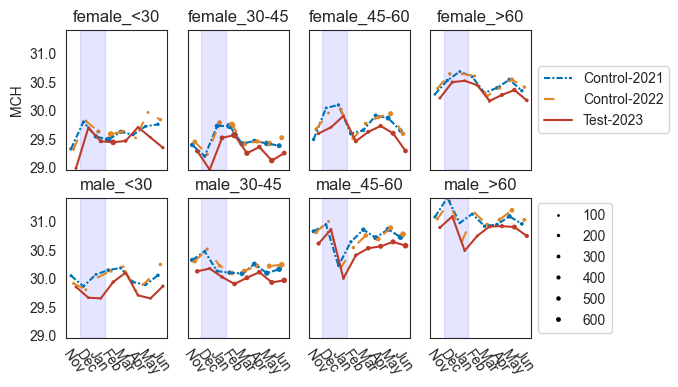

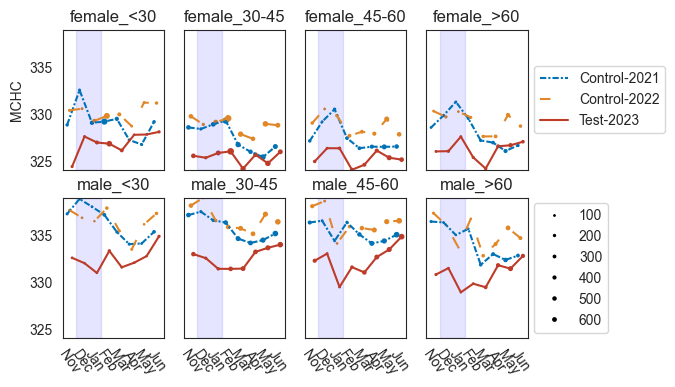

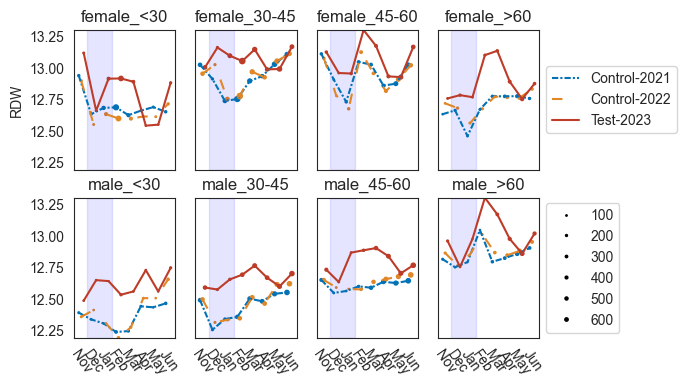

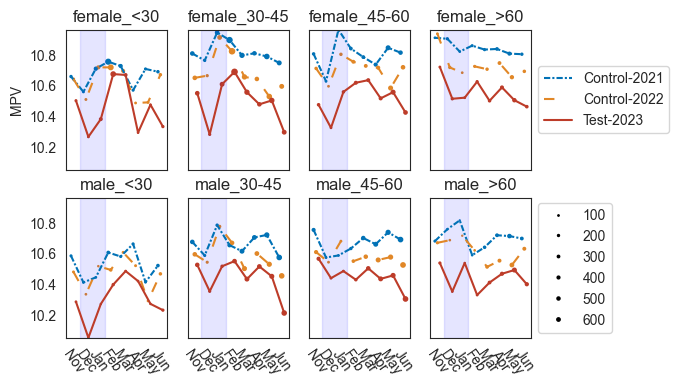

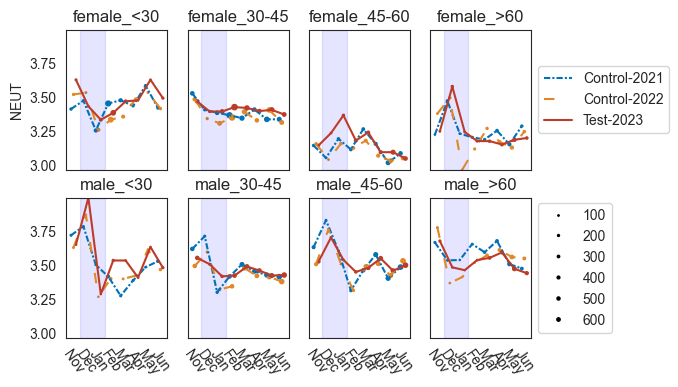

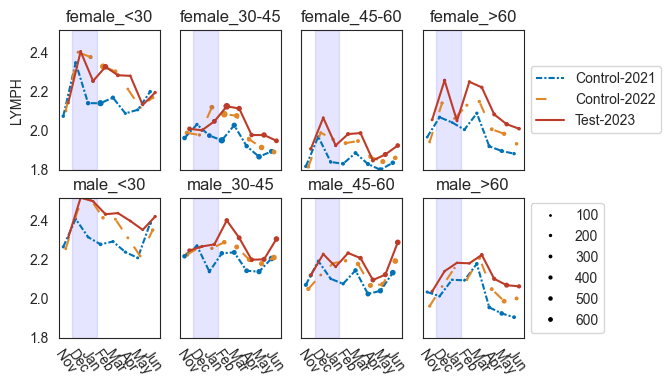

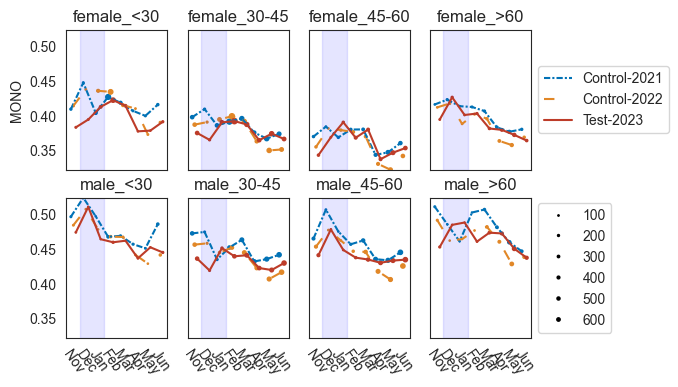

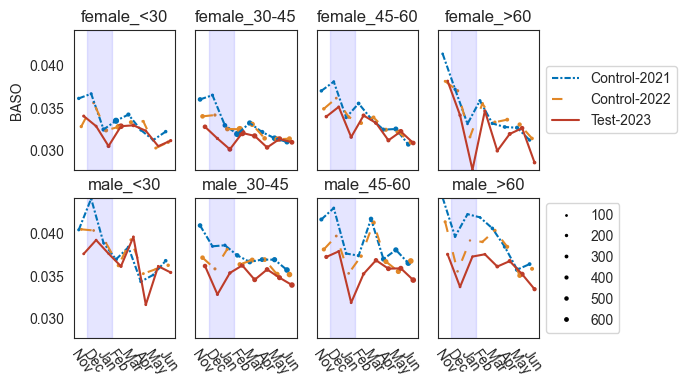

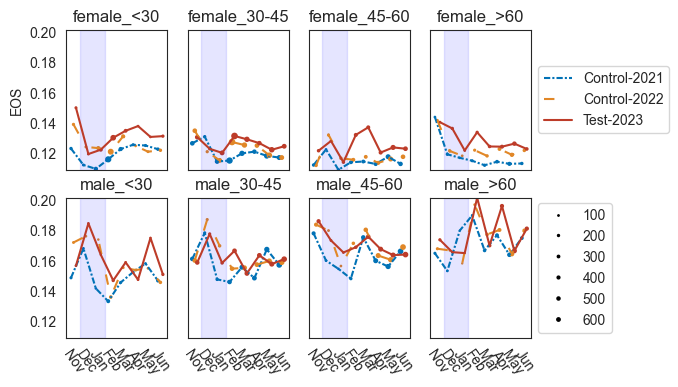

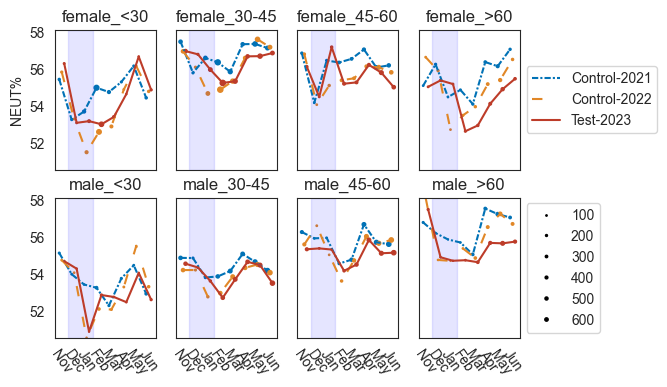

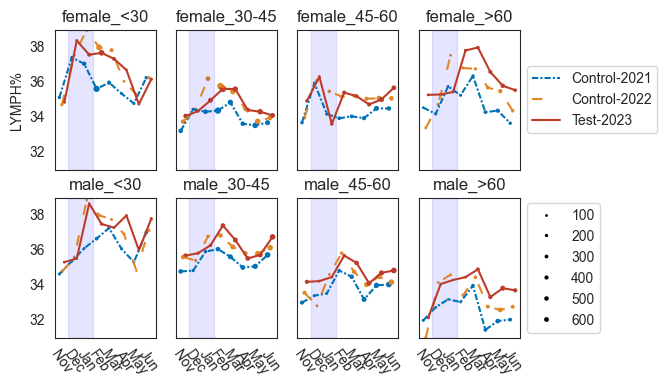

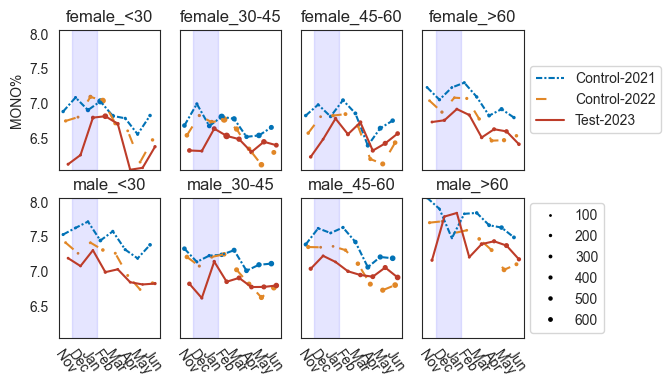

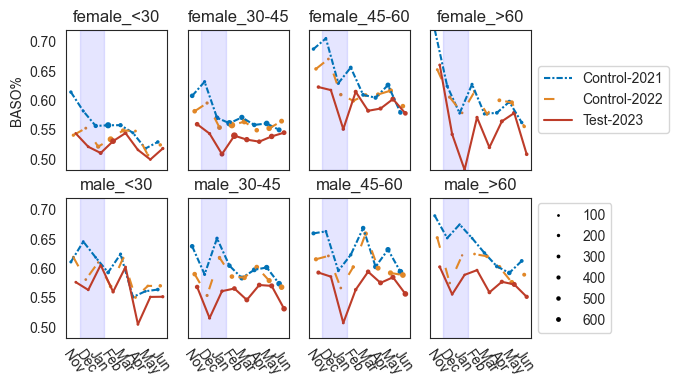

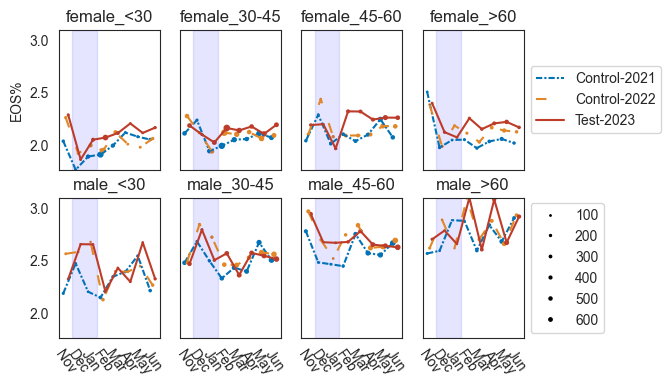

In [5]:
for tag in l_tags:
    plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
    fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


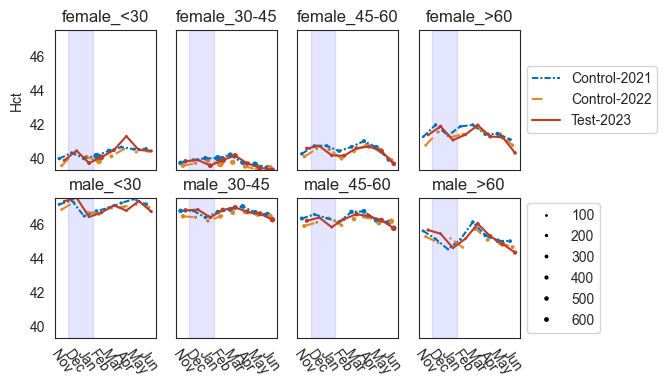

In [6]:
tag = "v9059"
plt_scatter = Scatter(figsize=(6,4), rename_dict=rename_dict)
fig,df_scatter_3p = plt_scatter.plot_scatter_ax_plus(df_table1plus_3p_revMM, tag, order=l_months)


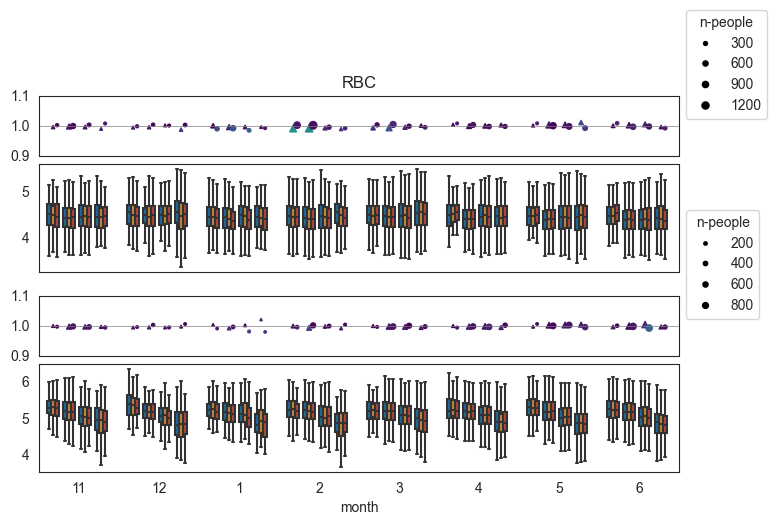

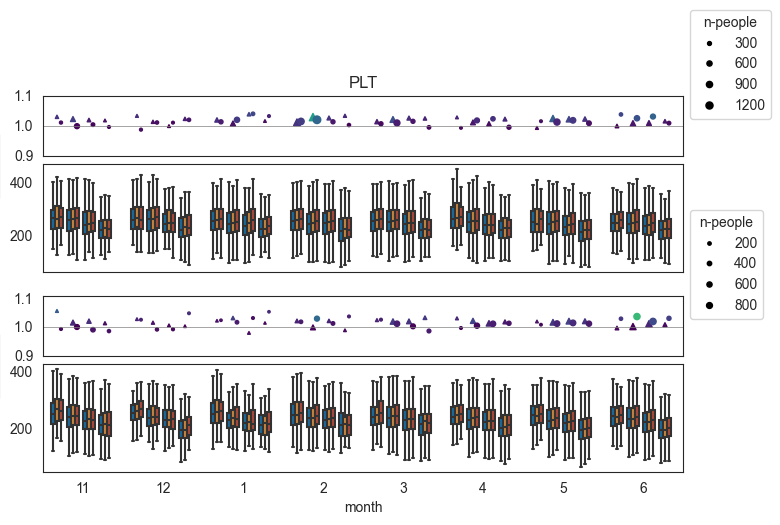

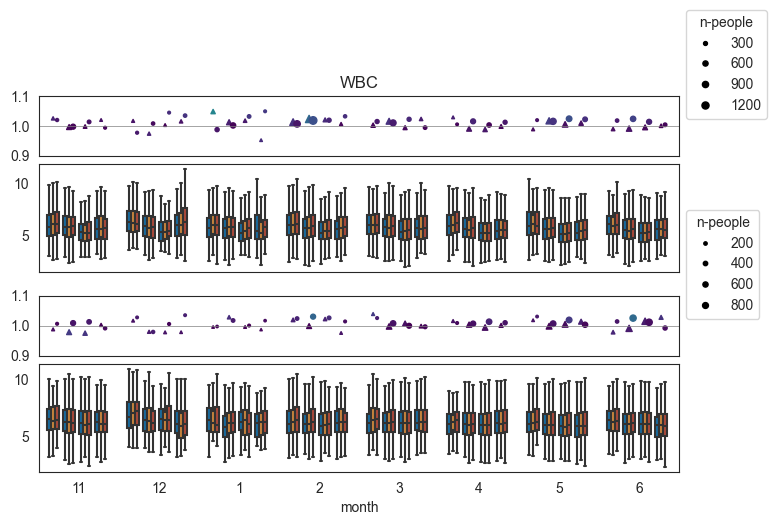

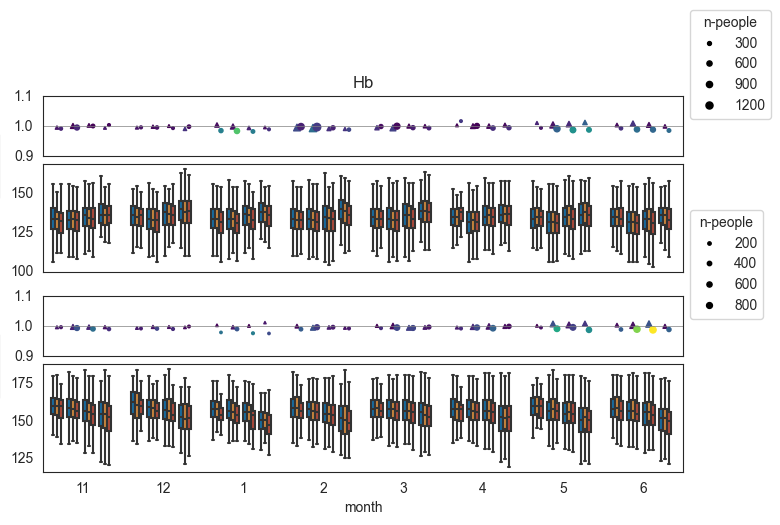

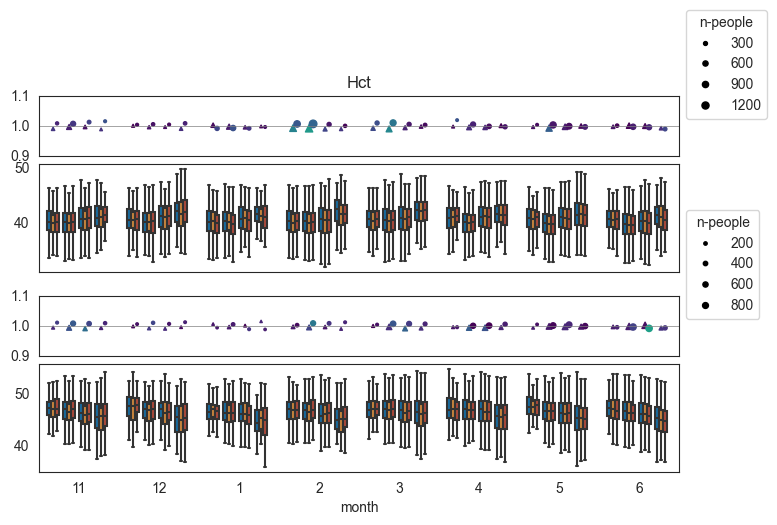

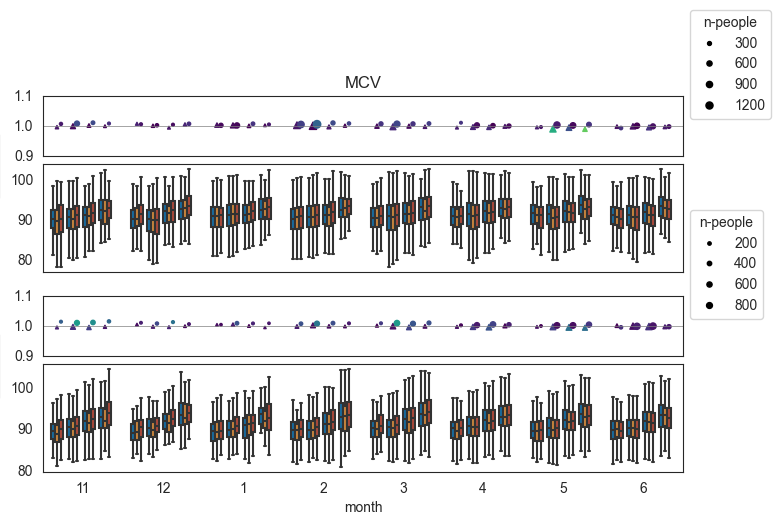

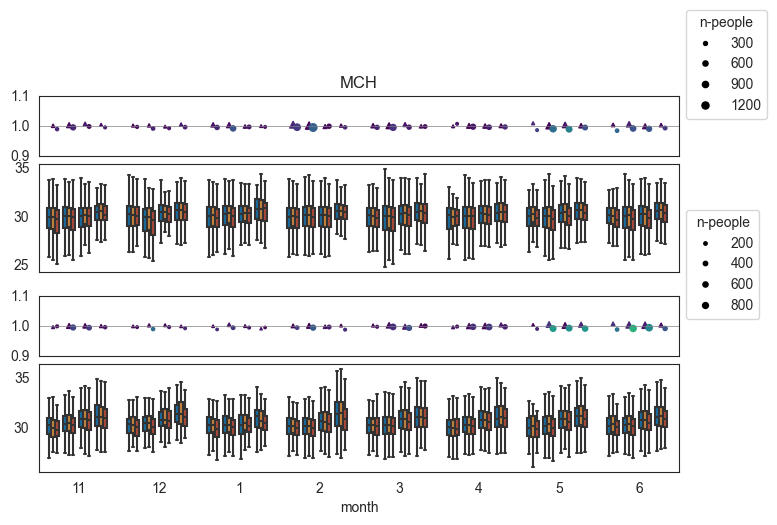

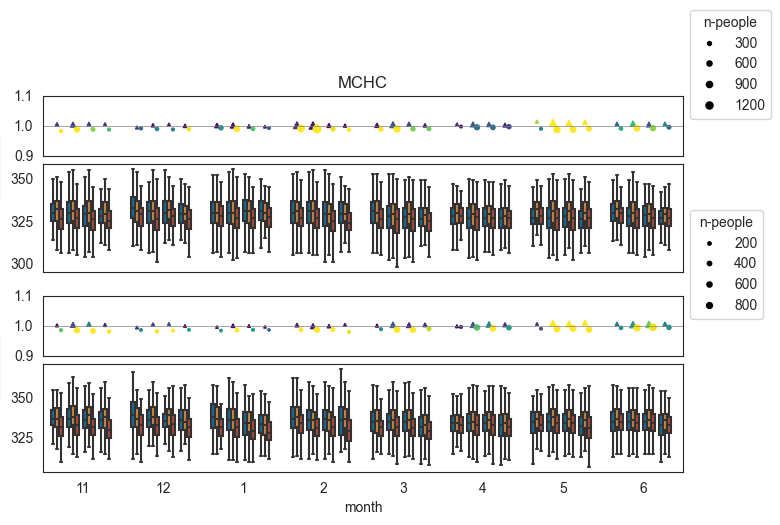

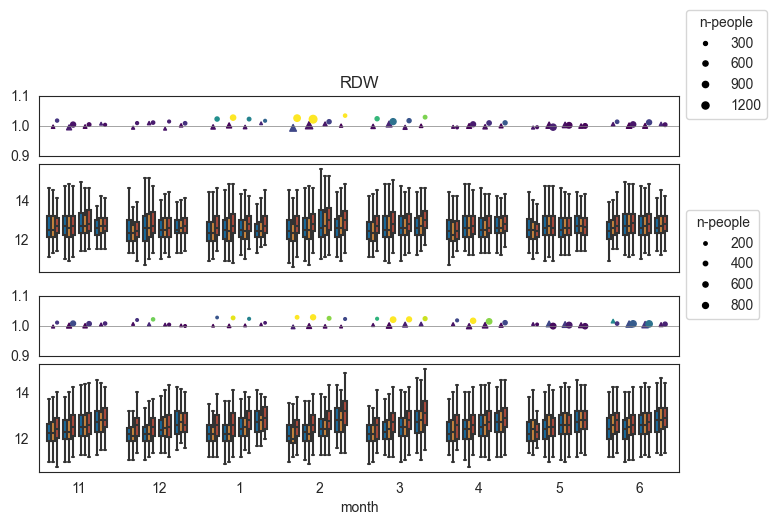

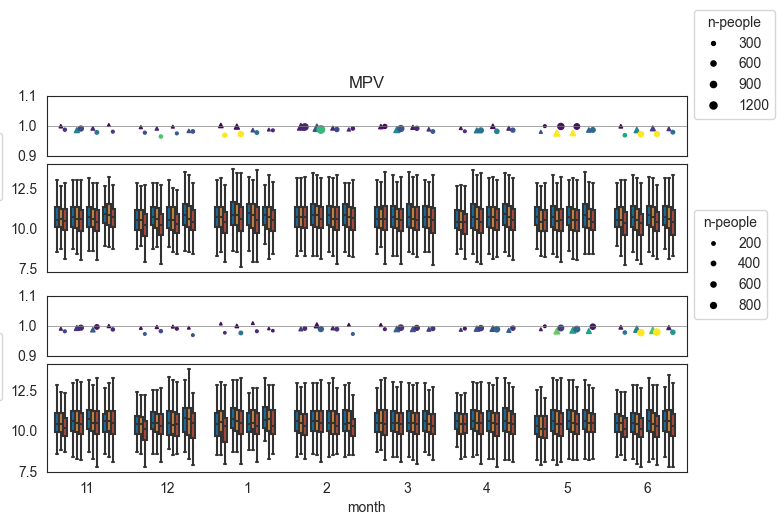

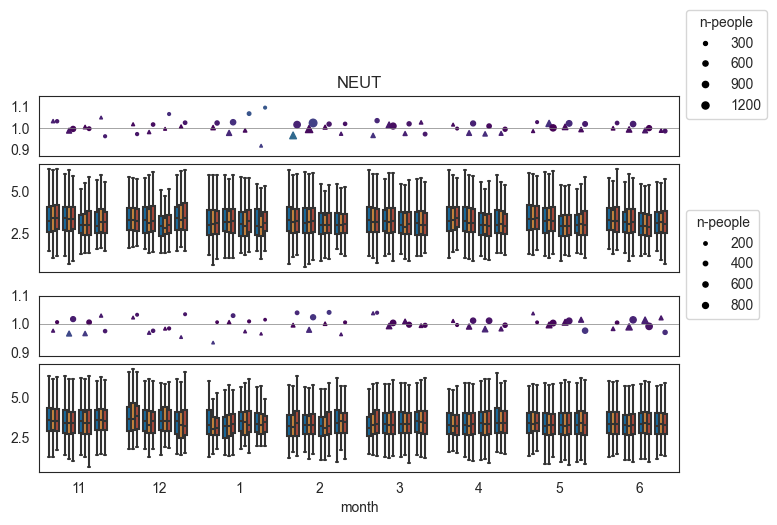

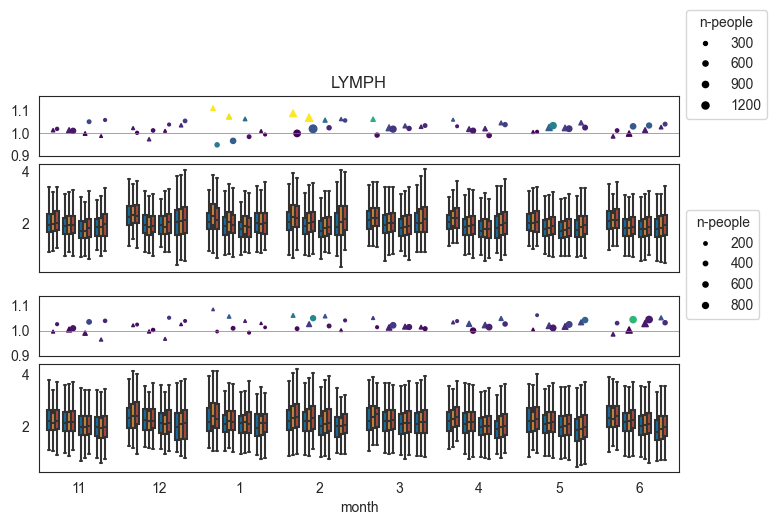

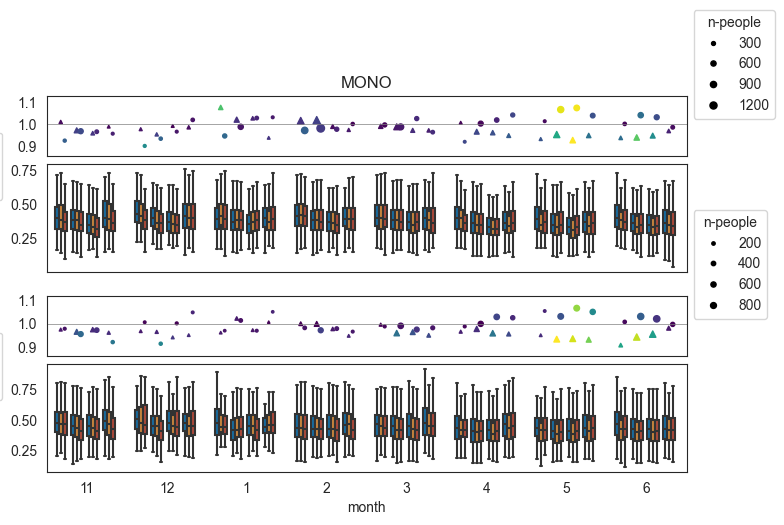

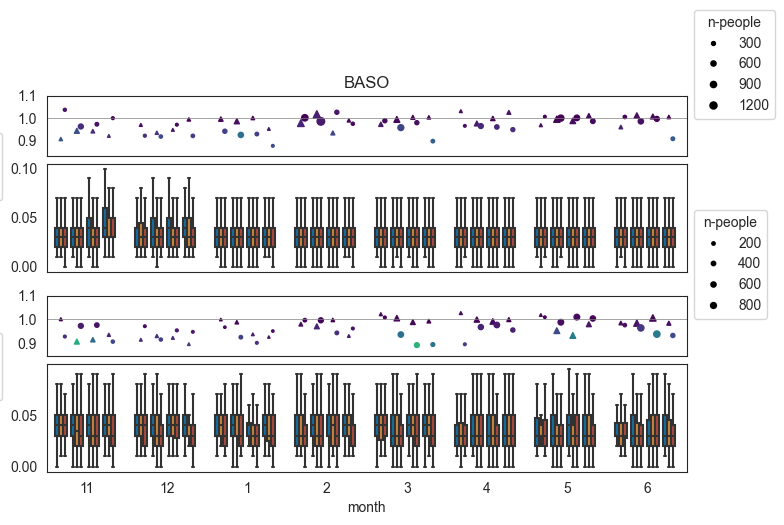

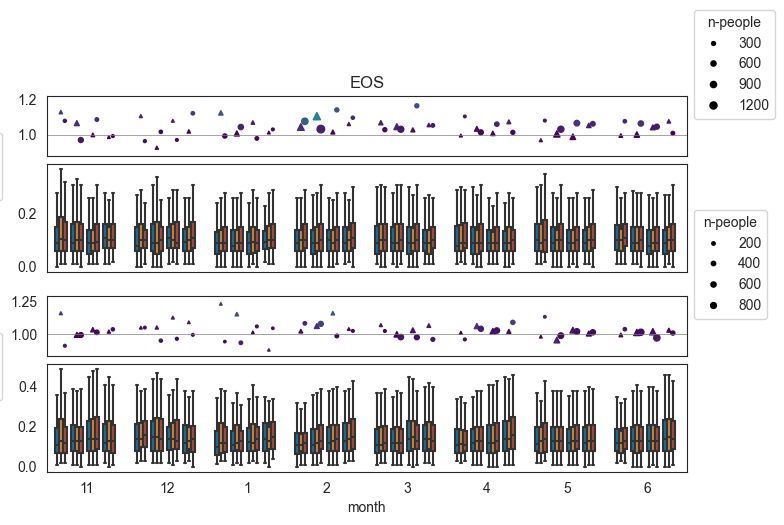

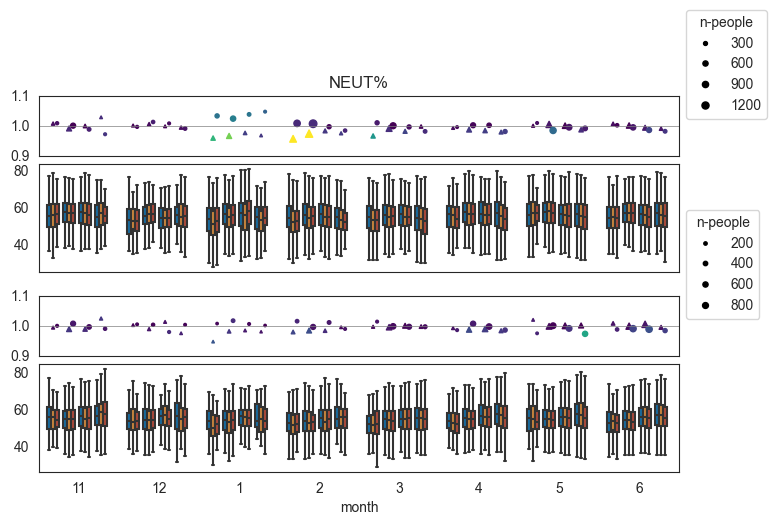

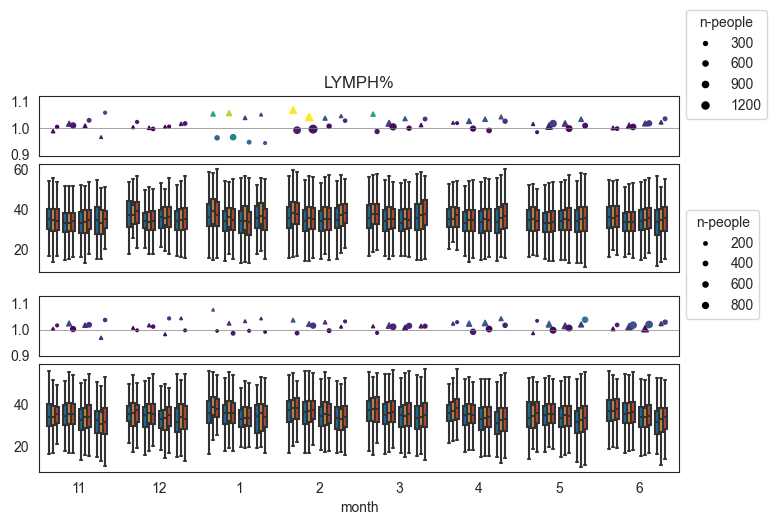

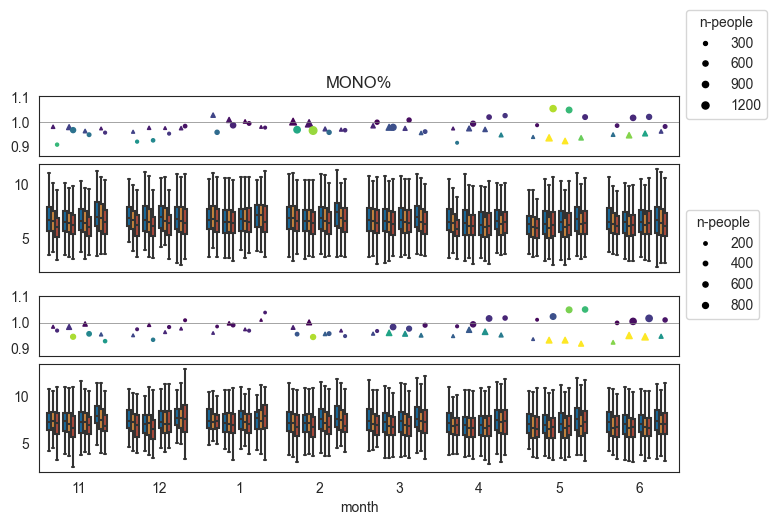

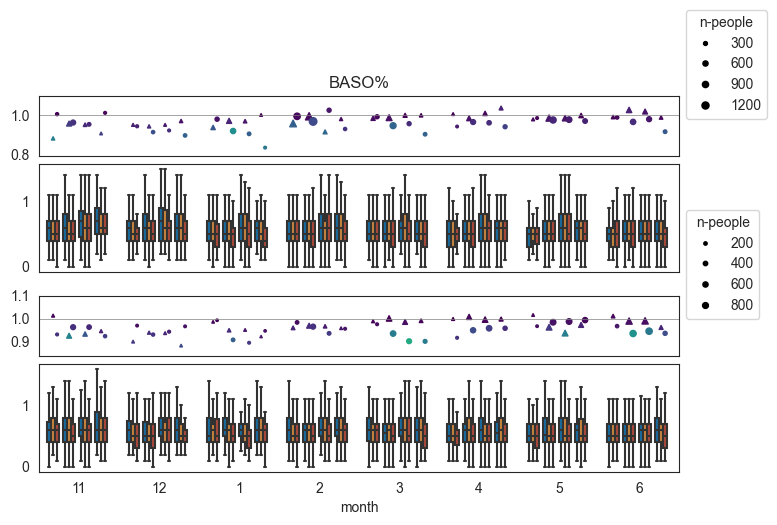

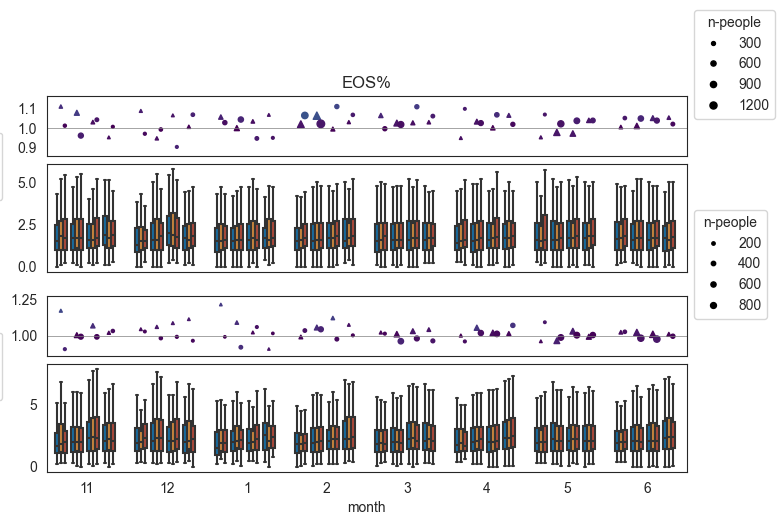

In [7]:
for tag in l_tags:
    fig, _ = plot_box.plot_bxxplot_pvalue(df_table1plus_3p_revMM, x="month", y=tag,
                                       hue_col_order=["female", "male"], order=[11,12, 1,2,3, 4,5,6], sns_type="boxplot"
    )